In [1]:
from IPython.display import HTML

HTML('''
<script>code_show=true; 

function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

# Práctica 1

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import string, random
import numpy as np
import matplotlib.pyplot as plt
import sys
import time

import queue as qe

from sklearn.linear_model import LinearRegression

import networkx as nx

In [4]:
def fit_plot(l, func_2_fit, size_ini, size_fin, step):
    l_func_values =[i*func_2_fit(i) for i in range(size_ini, size_fin+1, step)]
    
    lr_m = LinearRegression()
    X = np.array(l_func_values).reshape( len(l_func_values), -1 )
    lr_m.fit(X, l)
    y_pred = lr_m.predict(X)
    
    plt.plot(l, '*', y_pred, '-')

def n2_log_n(n):
    return n**2. * np.log(n)

En esta parte vamos a trabajar con grafos ponderados usando dos EdD:

Una matriz numpy de adyacencia, donde el elemento i, j indica el peso  c_{ij`  de la rama  (i, j)
Un diccionario de diccionarios de diccionarios donde las claves del primer diccionario G son índices de nodos, las claves de los diccionarios G[i] son los vértices de su lista de adyacencia y un diccionario G[i][j] contiene el peso de la rama (i, j).
Por ejemplo, para el gráfico

grafo

el código

l = [[0, 10, 1, np.inf],
[np.inf, 0, 1, np.inf],
[np.inf, np.inf, 0, 1 ],
[np.inf, 1, np.inf, 0]]

m_g = np.array(l)

generaría su matriz de adyacencia según se describe arriba, mientras que

d_g = {
0: {1: 10, 2:1}, 
1: {2: 1}, 
2: {3: 1},
3: {1: 1}
}

generaría su descripción como un dict.

In [5]:
l = [
[0, 10, 1, np.inf],
[np.inf, 0, 1, np.inf],
[np.inf, np.inf, 0, 1 ],
[np.inf, 1, np.inf, 0]
]

m_g = np.array(l)

def print_m_g(m_g):
    print("graph_from_matrix:\n")
    n_v = m_g.shape[0]
    for u in range(n_v):
        for v in range(n_v):
            if v != u and m_g[u, v] != np.inf:
                print("(", u, v, ")", m_g[u, v])

            
d_g = {
0: {1: 10, 2: 1}, 
1: {2: 1}, 
2: {3: 1},
3: {1: 1}
}

def print_d_g(d_g):
    print("\ngraph_from_dict:\n")
    for u in d_g.keys():
        for v in d_g[u].keys():
            print("(", u, v, ")", d_g[u][v])
            
print_m_g(m_g)
print_d_g(d_g)


graph_from_matrix:

( 0 1 ) 10.0
( 0 2 ) 1.0
( 1 2 ) 1.0
( 2 3 ) 1.0
( 3 1 ) 1.0

graph_from_dict:

( 0 1 ) 10
( 0 2 ) 1
( 1 2 ) 1
( 2 3 ) 1
( 3 1 ) 1


In [6]:
def rand_matr_pos_graph(n_nodes, sparse_factor, max_weight=50., decimals=0):
    """
    
    """
    m=np.random.random((n_nodes, n_nodes))
    np.place(m,m<1-sparse_factor,np.inf)
    m=m*max_weight # Reescalado de los datos
    np.fill_diagonal(m,0)
    return m.round(decimals)

def m_g_2_d_g(m_g):
    """
    
    TODO: ¿Hay que eliminar los 0's de lso dict?
    
    TODO: ¿Mejor forma de hacerlo?¿pythonic way?
    """
    dim=m_g.shape
    
    d_g={}
    for i in range(dim[0]):
        d_g[i]={}
        for j in range(dim[1]):
            if j != i and m_g[i][j] != np.inf:
                d_g[i][j]=m_g[i][j]

    return d_g

def d_g_2_m_g(d_g):
    """
    """
    l = len(d_g)
    m_g = np.full((l,l), np.inf)
    for i in d_g:
        for j in d_g[i]:
            m_g[i][j] = d_g[i][j]
    np.fill_diagonal(m_g,0)
    return m_g

if __name__=='__main__':
    m = rand_matr_pos_graph(3,0.3)
    print(m)
    d = m_g_2_d_g(m)
    print(d)
    print(d_g_2_m_g(d))



[[  0.  inf  inf]
 [ 37.   0.  inf]
 [ inf  39.   0.]]
{0: {}, 1: {0: 37.0}, 2: {1: 39.0}}
[[  0.  inf  inf]
 [ 37.   0.  inf]
 [ inf  39.   0.]]


In [7]:
def cuenta_ramas(m_g):
    """
    """
    dim = m_g.shape[0]
    # Al tamanno total de la matriz (dim**2) le restamos
    # el numero de inf. 
    # Restamos los ceros de la diagonal
    return dim**2-len(np.where(m_g == np.inf)[0])-dim    


def check_sparse_factor(n_grafos, n_nodes, sparse_factor):
    """
    """
    acum=0
    for n in range(n_grafos):
        m=rand_matr_pos_graph(n_nodes,sparse_factor)
        sf=cuenta_ramas(m)/n_nodes**2

        acum+=sf
    return acum/n_grafos


############################################################ checking
print(cuenta_ramas(m_g))

n_grafos=50
n_nodes=20
sparse_factor = 0.75

print("\ntrue_sparse_factor: %.3f" % sparse_factor, 
      "\nexp_sparse_factor:  %.3f" % check_sparse_factor(n_grafos=n_grafos, n_nodes=n_nodes, sparse_factor=sparse_factor))

5

true_sparse_factor: 0.750 
exp_sparse_factor:  0.710


2 Guardando y leyendo grafos

2.1 Guardando y leyendo grafos con pickle

In [8]:
def save_object(obj, f_name="obj.pklz", save_path='.'):
    """"""
    # Apertura del fichero comprimido en modo escritura
    file_path = os.path.join(save_path, f_name)
    with gzip.open(file_path, mode="wb", compresslevel=9) as file:
        # Volcado del objeto
        pickle.dump(obj, file, protocol=None)


def read_object(f_name, save_path='.'):
    """"""
    # Apertura del fichero comprimido en modo lectura
    file_path = os.path.join(save_path, f_name)
    with gzip.open(file_path, mode="rb", compresslevel=9) as file:
        # Lectura del objeto
        pickle.load(file)
       

2.2 The Trivial Graph Format

In [9]:
def d_g_2_TGF(d_g, f_name):
    """
    """
    with open(f_name,'w') as f:
        for k in d_g:
            print(str(k), file=f)
        print('#', file=f)

        for d in d_g:
            for dd in d_g[d]:
                print("{0}\t{1}\t{2}".format(d, dd, d_g[d][dd]), file=f)
    
def TGF_2_d_g(f_name):
    """
    """
    d_g = {}
    with open(f_name, 'r') as file:
        ls= file.readlines()
        i=0
        for l in ls:
            if l == '#\n':
                break
            d_g[int(l[:-1])] = {}
            i+=1
        for line in ls[i+1:]:
            rama = line[:-1].split('\t')
            d_g[int(rama[0])][int(rama[1])] = float(rama[2])
    return d_g 
    
    
############################################################ checking
f_name = "gr.tgf"
d_g_2_TGF(d_g, f_name)
                       
d_g_2 = TGF_2_d_g(f_name)            
print_d_g(d_g)
print_d_g(d_g_2)


graph_from_dict:

( 0 1 ) 10
( 0 2 ) 1
( 1 2 ) 1
( 2 3 ) 1
( 3 1 ) 1

graph_from_dict:

( 0 1 ) 10.0
( 0 2 ) 1.0
( 1 2 ) 1.0
( 2 3 ) 1.0
( 3 1 ) 1.0


3 Distancias Mínimas en Grafos

3.1 Programming and Timing Dijkstra

In [10]:
from queue import PriorityQueue

def dijkstra_d(d_g, u):
    """ Implementacion del algoritmo de Dijkstra con listas de adyacencia
    :d_g: Lista de adyacencia que representa el grafo
    :u: Nodo inicial
    :type d_g: dictionary, keys are integers, values are dictionarys
    :type u: int
    :return: d_dist lista de distancias minimas encontradas
    :return: d_prev camino
    """
    # Inicializacion
    s = {node: False for node in d_g}
    d_prev = {}
    d_dist = {node: np.inf for node in d_g}
    Q = PriorityQueue()
    d_dist[u] = 0
    Q.put((d_dist[u],u))
    while not Q.empty():
        d_v, v = Q.get()
        if not s[v]:
            s[v] = True
        for z in d_g[v]:
            if d_dist[z] > d_v + d_g[v][z]:
                d_dist[z] = d_v + d_g[v][z]
                d_prev[z] = v
                Q.put((d_dist[z],z))
    return d_dist,d_prev

def dijkstra_m(m_g, u):
    """ Implementacion del algoritmo de Dijkstra con matrices
    :u: Nodo inicial
    :type m_g: np 2 dimentional array
    :type u: int
    :return: d lista de distancias minimas encontradas
    :return: p camino
    """
    # Inicializacion
    n = m_g.shape[0]
    s = {i: False for i in range(n)}
    d_prev = {}
    d_dist = {i: np.inf for i in range(n)}
    Q = PriorityQueue()
    d_dist[u] = 0
    Q.put((d_dist[u],u))
    while not Q.empty():
        d_v, v = Q.get()
        if not s[v]:
            s[v] = True
        for z in range(n):
            if d_dist[z] > d_v + m_g[v][z]:
                d_dist[z] = d_v + m_g[v][z]
                d_prev[z] = v
                Q.put((d_dist[z],z))
    return d_dist,d_prev 
def min_paths(d_prev):
    """
    :d_prev: diccionario con el nodo previo a cada nodo
    :d_prev type: diccionario
    :return: diccionario de listas con el camino desde cada nodo inicial a cada nodo
    """
    d_path = {}
    for node in d_prev:
        node2 = d_prev[node]
        d_path[node] = [node2, node]
        while node2 in d_prev:
            node2 = d_prev[node2]
            d_path[node].insert(0,node2)
    d_path[node2] = [node2]
    return d_path
    
    
def time_dijkstra_m(n_graphs, n_nodes_ini, n_nodes_fin, step, sparse_factor=.25):
    """ Genera un conjunto de grafos con distintos numeros de nodos para comprobar
    el coste teorico del algoritmo de Dijkstra.
    :n_grafos: numero de grafos a generar
    :n_nodes_ini: numero inicial de nodos del grafo
    :n_nodes_fin: numero final de nodos del grafo
    :step: paso en cada iteracion de numero de nodos
    :sparse_factor: factor de dispersion de la matriz
    :type n_grafos: int
    :type n_nodes_ini: int
    :type n_nodes_fin: int
    :type step: int
    :type sparse_factor: float
    :return: time_l lista con los tiempos en cada paso
    """
    time_l = []
    n = n_nodes_ini
    while n <= n_nodes_fin:
        m_g = rand_matr_pos_graph(n, sparse_factor)
        #t = []
        t = 0
        for _ in range(n_graphs):
            for i in range(n):
                ini = time.time()
                dijkstra_m(m_g,i)
                fin = time.time()
        #        t.append(fin-ini)
                t+=(fin-ini)
        #time_l.append(np.mean(t))
        time_l.append(t/(n_graphs*n))
        n+=step
    return time_l     

def time_dijkstra_d(n_graphs, n_nodes_ini, n_nodes_fin, step, sparse_factor=.25):
    """ Genera un conjunto de grafos con distintos numeros de nodos para comprobar
    el coste teorico del algoritmo de Dijkstra.
    :n_grafos: numero de grafos a generar
    :n_nodes_ini: numero inicial de nodos del grafo
    :n_nodes_fin: numero final de nodos del grafo
    :step: paso en cada iteracion de numero de nodos
    :sparse_factor: factor de dispersion de la matriz
    :type n_grafos: int
    :type n_nodes_ini: int
    :type n_nodes_fin: int
    :type step: int
    :type sparse_factor: float
    :return: time_l lista de los tiempos en cada paso
    """

    time_l = []
    n = n_nodes_ini
    while n <= n_nodes_fin:
        m_g = rand_matr_pos_graph(n, sparse_factor)
        d_g= m_g_2_d_g(m_g)
        t = 0
        for _ in range(n_graphs):
            for i in range(n):
                ini = time.time()
                dijkstra_d(d_g,i)
                fin = time.time()
                t+=(fin-ini)
        time_l.append(t/(n_graphs*n))
        n+=step
    return time_l

############################################################ checking
d_g = {
0: {1: 10, 2: 1}, 
1: {2: 1}, 
2: {3: 1},
3: {1: 1}
}

u_ini = 3

d_dist, d_prev = dijkstra_d(d_g, u_ini)
print(d_dist, '\n', min_paths(d_prev))

d_g_nx = nx.DiGraph()
l_e = [(0, 1, 10), (0, 2, 1), (1, 2, 1), (2, 3, 1), (3, 1, 1)]
d_g_nx.add_weighted_edges_from(l_e)

d, p = nx.single_source_dijkstra(d_g_nx, u_ini, weight='weight')    
print(d, '\n', p)


{0: inf, 1: 1, 2: 2, 3: 0} 
 {1: [3, 1], 2: [3, 1, 2], 3: [3]}
{1: 1, 2: 2, 3: 0} 
 {1: [3, 1], 2: [3, 1, 2], 3: [3]}


3.2 Plotting Dijkstra's Execution Times
Fit below a linear model  An2logn+B  to the times in the returned lists and plot the real and fitted times discussing the results.

In [11]:
n_graphs=20
n_nodes_ini=10 
n_nodes_fin=100
step=10
sparse_f= 0.25
l_t_d = time_dijkstra_d(n_graphs=n_graphs, n_nodes_ini=n_nodes_ini, 
                        n_nodes_fin=n_nodes_fin, step=step, sparse_factor=sparse_f)

In [12]:
n_graphs=20
n_nodes_ini=10 
n_nodes_fin=100
step=10
sparse_f= 0.25
l_t_m = time_dijkstra_m(n_graphs=n_graphs, n_nodes_ini=n_nodes_ini, 
                        n_nodes_fin=n_nodes_fin, step=step, sparse_factor=sparse_f)

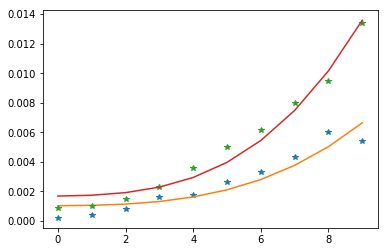

In [13]:
fit_plot(l_t_d, n2_log_n, size_ini=n_nodes_ini, size_fin=n_nodes_fin, step=step)
fit_plot(l_t_m, n2_log_n, size_ini=n_nodes_ini, size_fin=n_nodes_fin, step=step)

4 The networkx Library
We are going to use the networkx library to check our Dijkstra results and to get alternative times.

An example of loading a networkx directed graph is to use a list (i, j, w) of (i, j) edges with weights w can be seen in the following cell:

In [14]:
g = nx.DiGraph()

l_e = [(0, 1, 10), (0, 2, 1), (1, 2, 1), (2, 3, 1), (3, 1, 1)]
g.add_weighted_edges_from(l_e)

for k1 in g.nodes():
    for k2 in g[k1].keys():
        print('(', k1, k2, ')', g[k1][k2]['weight'])

( 0 1 ) 10
( 0 2 ) 1
( 1 2 ) 1
( 2 3 ) 1
( 3 1 ) 1


In [15]:
def d_g_2_nx_g(d_g):
    """
    """
    pass
    

def nx_g_2_d_g(nx_g):
    """
    """
    pass
    
    
def time_dijkstra_nx(n_graphs, n_nodes_ini, n_nodes_fin, step, sparse_factor=.25):
    """
    """
    pass


############################################################ checking
d_g = {
0: {1: 10, 2: 1}, 
1: {2: 1}, 
2: {3: 1},
3: {1: 1}
}

d_g_nx = d_g_2_nx_g(d_g)

print_d_g(d_g)
(d_g_nx)[0][1]


graph_from_dict:

( 0 1 ) 10
( 0 2 ) 1
( 1 2 ) 1
( 2 3 ) 1
( 3 1 ) 1


TypeError: 'NoneType' object is not subscriptable

In [ ]:
n_graphs=20
n_nodes_ini=10 
n_nodes_fin=100
step=10
sparse_f= 0.25
l_t_nx = time_dijkstra_nx(n_graphs=n_graphs, n_nodes_ini=n_nodes_ini, 
                          n_nodes_fin=n_nodes_fin, step=step, sparse_factor=sparse_f)

In [ ]:
fit_plot(l_t_nx, n2_log_n, size_ini=n_nodes_ini, size_fin=n_nodes_fin, step=step)